- KEYWORDS: mechanism, rate law determination, active intermediate


![img](//cafehayek.com/wp-content/uploads/2014/03/miracle_cartoon.jpg)

# Deriving rate laws from mechanisms

We now begin considering how complex, non-elementary rate laws are formed. This is often done by observing behavior in some limiting reaction conditions, e.g. at low concentrations, or at high concentrations, and then constructing a reaction mechanism that is consistent with these observations. Chapter 7 in Fogler is the chapter that discusses this topic.
For example, For the reaction $(CH_3)_2N_2 \rightarrow C_2H_6 + N_2$ it has been observed that:

-   The reaction is first order in reactants at high pressures
-   The reaction is second order in reactants at low pressures

In other words, no simple power law kinetic expression can account for a change in reaction order. The rate law is **not** $r = k C_A$ for all conditions (especially low pressure).
We consider the possibility that the reaction occurs by a *mechanism* of several steps. These steps will be elementary, so that we can write the rate law for the step by inspection.
Let us consider these steps for the overall reaction $A \rightarrow B + C$

\begin{align*}
2A \rightarrow A + A^*  \\
A^* + A \rightarrow 2A  \\
A^* \rightarrow B + C
\end{align*}

With these rate laws (because we require these reactions to be elementary)

\begin{align*}
r_1 = k_1 C_A^2 \\
r_2 = k_2 C_A^* C_A \\
r_3 = k_3 C_A^*
\end{align*}

We have introduced a new species $A^*$, which we refer to as an active intermediate. This is a short-lived, reactive species formed by collisions with other molecules.
We cannot readily measure the concentration of $A^*$, which makes it impossible to determine the rate constants for reactions with $A^*$ as a reactant. Molecular simulations makes in increasingly possible to estimate these. Femtosecond spectroscopy has "observed" some of the intermediates ([1999 Nobel Prize](http://www.nobelprize.org/nobel_prizes/chemistry/laureates/1999/)).

-   Let us assume that $A^*$ is consumed about as fast as it is produced
-   The net rate of production will then be approximately zero

\begin{align}
0 &=& r_1 - r_2 - r_3 \\
  &=& k_1 C_A^2 - k_2 C_A^* C_A - k_3 C_A^*
\end{align}

-   We can solve for $C_A^* = \frac{k_1 C_A^2}{k_3 + k_2 C_A}$
-   We can determine $r_B = k_3 C_A^* = \frac{k_3 k_1 C_A^2}{k_3 + k_2 C_A}$.
-   By stoichiometry we have  $r_A = -k_3 C_A^* = \frac{k_3 k_1 C_A^2}{k_3 + k_2 C_A}$
-   For low concentratrations of $A (k_3 \gg k_2 C_A)$ the rate will appear second order in $A$
-   For high concentratrations of $A (k_3 \ll k_2 C_A)$ the rate will appear first order in $A$
-   Let us review what we did
    1.  We *assumed* or *postulated* a mechanism of elementary reaction steps involving active intermediates
        -   The steps of the mechansim *must* add up to the overall reaction
    2.  We set the net rate of production of the active intermediates to zero and used that to solve for the concentration of the active intermediates
    3.  We plugged the concentration of the active intermediate into rate expressions for products (or reactants)
    4.  We compared the behavior of the resulting rate law to experimental observations for consistency

We can say our mechanism is *consistent* with experimental observations. This *does not* prove this is the operating mechanism.

-   Other mechanisms may also be consistent
-   Chemistry is concerned with getting this right
-   We may be satisfied we have a rate law that is reasonably accurate over a broad pressure range

The next step would be fitting the model to data to get numerical estimates of the parameters. You may construct multiple mechanisms, and derive many rate laws to see which one fits data the best.

## An application in ethane cracking

-   Adapted from Fogler, 4th ed. Example 7-2 page 387
-   Ethane cracks at high temperatures to form hydrogen, ethylene and higher hydrocarbons that are more valuable than ethane

$C_2H_6 \rightarrow H_2 + C_2H_4 + other products$

-   Ethane cracks according to the following mechanism

\begin{align*}
C_2H_6 \rightarrow 2 CH_3^{.} \\
CH_3^{.} + C_2H_6 \rightarrow CH_4 + C_2H_5^{.}  \\
C_2H_5^{.} \rightarrow H^{.} + C_2H_4  \\
C_2H_6 + H^{.} \rightarrow C_2H_5^{.} + H_2 \\
2 C_2H_5^{.} \rightarrow C_4H_{10}
\end{align*}

-   A = $C_2H_6$
-   B = $CH_3^{.}$
-   C = $C_2H_5^{.}$
-   D = $H^{.}$
-   E = $C_2H_4$
-   With these rate laws

\begin{align*}
r_1 = k_1 C_A \\
r_2 = k_2 C_A C_B \\
r_3 = k_3 C_C \\
r_4 = k_4 C_A C_D \\
r_5 = k_5 C_C^2
\end{align*}

-   In this mechanism, any species with a $^{.}$ is a radical (a highly reactive intermediate species) whose concentration cannot be easily measured
-   We would like an analytical expression for the rate of consumption of ethane, and the rate of production of ethylene

First, we will consider what is required to solve for the concentrations of each species in the way we have considered so far. If we had rate constants for each reaction, we could treat this as a straightforward multiple reaction system.

-   The rate constants of these particular steps are known from detailed kinetic studies:
    -   $k_1$ = 1.5e-3 1/s
    -   $k_2$ = 2.3e6 L/mol/s
    -   $k_3$ = 5.7e5 1/s
    -   $k_4$ = 9.5e8 L/mol/s
    -   $k_5$ = 2.0e9 L/mol/s
-   You see immediately that there are orders of magnitude differences in the rate constants
    -   These reflect different transition states, changes in entropy, and other factors
-   That suggests any set of mole balances would be very stiff
-   Let us try to set them up for a batch reactor
-   Let the initial concentration of ethane be 0.1 M, and assume constant volume.
-   We will need net rates for each species

First we start with the given information

In [1]:
import numpy as np
from scipy.integrate import odeint

k1 = 1.5e-3   # 1/s
k2 = 2.3e6    # L/mol/s
k3 = 5.7e4    # 1/s
k4 = 9.5e8    # L/mol/s
k5 = 2.0e9    # L/mol/s

Next, we setup the mole balances. Since we have a constant volume batch reactor these will all look like $\frac{dC_i}{dt} = r_i$.

In [1]:
def dCdt(C, t):
    Ca, Cb, Cc, Cd, Ce = C

    r1 = k1 * Ca
    r2 = k2 * Ca * Cb
    r3 = k3 * Cc
    r4 = k4 * Ca * Cd
    r5 = k5 * Cc**2

    ra = -r1 - r2 - r4
    rb = 2*r1 - r2
    rc = r2 - r3 + r4 - 2*r5
    rd = r3 - r4
    re = r3  # this is the ethylene

    dCadt = ra
    dCbdt = rb
    dCcdt = rc
    dCddt = rd
    dCedt = re
    return [dCadt, dCbdt, dCcdt, dCddt, dCedt]

Now, we can solve the equations.

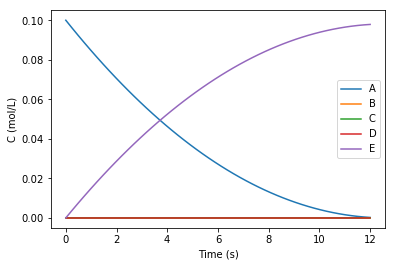

In [1]:
C0 = [0.1, 0, 0, 0, 0]

tspan = np.linspace(0, 12)
sol1 = odeint(dCdt, C0, tspan)

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(tspan, sol1)
plt.legend(['A', 'B', 'C', 'D', 'E'], loc='best')
plt.xlabel('Time (s)')
plt.ylabel('C (mol/L)')

It appears the intermediates are equal to zero. That can not be true, so here we look at them another way with a log plot.

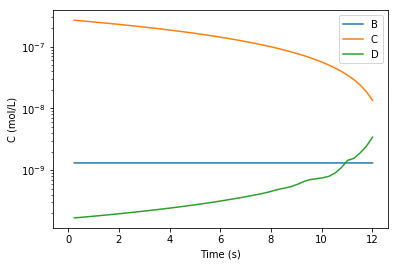

In [1]:
# now plot the intermediates
plt.figure()
plt.semilogy(tspan, sol1[:, 1:4])
plt.legend(['B', 'C', 'D'], loc='best')
plt.xlabel('Time (s)')
plt.ylabel('C (mol/L)')

Now you can see the concentrations are very small.

-   These figures shows that only two species in the equations have significant concentrations
    -   Ethane which disappears
    -   Ethylene which appears
    -   We did not consider the formation of butane, but we could have by adding another mole balance

-   All reactive intermediates have very low concentrations, so low we must look at them on a log scale.

-   Thus these radical species are examples of active intermediates

### Deriving a simplified rate law

Let us now proceed to derive a rate law that does not contain an active intermediate species.

-   We seek an expression for $r_E$
    -   $r_E = k_3 C_C$
    -   But we need to replace $C_C$ with species that are measurable
-   We will set the net rates of each active intermediate to zero

\begin{align}
r_B = 0 &=& 2r_1 - r_2 \\
r_C = 0 &=& r_2 - r_3 - 2r_5 \\
r_D = 0 &=& r_3 - r_4
\end{align}

-   Now, we need to solve for each reactive intermediate concentration
-   It takes some algebra to arrive at

\begin{align}
C_B &=& \frac{2k_1}{k_2} \\
C_C &=& \left(\frac{k_1}{k_5} C_A \right )^{1/2} \\
C_D &=& \frac{k_3}{k_4}\left(\frac{k_1}{k_5}\right)^{1/2} C_A^{1/2}
\end{align}

-   Now we can express the rate of production of ethylene (E) as

$ r_E = k_3 C_C = k_3 \left(\frac{k_1}{k_5} C_A \right )^{1/2} $

-   To use this in a mole balance, we also need $C_A$

\begin{align}
r_A &=& -r_1 - r_2 - r_4 \\
    &=& -k_1 C_A - k_2 C_A C_B - k_4 C_A C_D \\
    &=& -k_1 C_A - k_2 C_A \frac{2k_1}{k_2} - k_4 \frac{k_3}{k_4}\left(\frac{k_1}{k_5}\right)^{1/2} C_A^{-1/2}\\
    &=& -3 k_1 C_A - k_3 \left(\frac{k_1}{k_5} C_A\right)^{1/2}
\end{align}

-   Now we have an analytical expression for the rate of consumption of ethane!
-   It is complicated, and nonlinear in rate constants
-   We probably could not fit 5 parameters to data
-   We would normally consider lumping parameters
    -   For example, $-r_A = k_1' C_A + k_2' C_A^{1/2}$
    -   $k_2' = k_3 \left ( \frac{k_1}{k_5}\right )^{1/2}$
-   The lumped parameters are made up of rate constants from elementary steps

**excerise**: Work out all the algebra to confirm the results derived above.

-   Now, we work out the example with the simplified rate law.

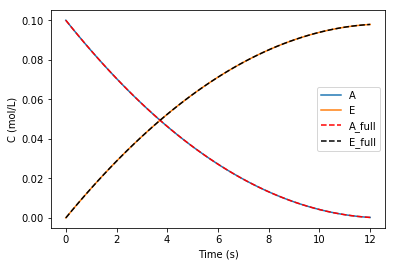

In [1]:
def dC2dt(C, t):
    Ca, Ce = C

    ra = -k1 * Ca - k2 * Ca * 2 * k1 / k2 - k3 * (k1 / k5 * Ca)**0.5
    re = k3 * (k1 / k5 * Ca)**0.5

    dCadt = ra
    dCedt = re
    return [dCadt, dCedt]

C0 = [0.1, 0]

tspan = np.linspace(0, 12)
sol2 = odeint(dC2dt, C0, tspan)

plt.plot(tspan, sol2)
plt.plot(tspan, sol1[:, 0], 'r--', tspan, sol1[:, -1], 'k--')
plt.legend(['A', 'E', 'A_full', 'E_full'], loc='best')
plt.xlabel('Time (s)')
plt.ylabel('C (mol/L)')

-   You can see the concentration profiles for the full model and the derived rate law are visually indistinguishable

-   The new rate law does not have any active intermediates in it

-   The new rate law is an approximation (a very good one in this case) of the real system

-   You need data to evaluate the utility of a proposed rate law

# Summary

-   When there are many steps in a mechanism, not all of them are kinetically important.
-   That means we can often find simple expressions that accurately describe the kinetics
    -   We have to be careful that we validate the mechanism for the conditions we use them
-   A common approach to deriving rate laws is the use of *active intermediates*
    -   We postulate a mechanism that involves active intermediates in *elementary* reactions
    -   We set the net rate of production of each active intermediate to 0.
    -   Then use algebra to eliminate the unknown concentrations in the rate expression of the desired species.